In [1]:
import pandas as pd
import numpy as np
import re
import string

In [2]:
df = pd.read_csv('musicLyrics.csv')
df.head()

,Lyric
0,Cryptic psalms Amidst the howling winds A scor...
1,Im sleeping tonight with all the wolves Were d...
2,Wings of the darkest descent Fall from the rea...
3,[Verse 1] Norrid Radd was my real name Had a j...
4,Deep in the dungeons of doom and despair Sneak...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Lyric   2999 non-null   object
dtypes: object(1)
memory usage: 23.6+ KB


# Preprocessing Funtions

In [ ]:
STOP_WORDS = [
   'a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at',
   'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by',
   'can', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during',
   'each', 'few', 'for', 'from', 'further',
   'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's",
   'hers', 'herself', 'him', 'himself', 'his', 'how', "how's",
   'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself',
   "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself',
   'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
   'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such',
   'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these', 'they',
   "they'd", "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too',
   'under', 'until', 'up', 'very',
   'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's",
   'where', "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't",
   'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves'
]

def remove_stop_words(text, stop_words_list):

   if not isinstance(text, str):
      return ""
      
   stop_words_pattern = re.compile(r'\b(' + r'|'.join(stop_words_list) + r')\b\s*', re.IGNORECASE)
   
   cleaned_text = stop_words_pattern.sub('', text)
   
   return cleaned_text

In [5]:
PUNCTUATION_TO_REMOVE = string.punctuation.replace("'", "")

def remove_punctuation_and_special_chars(text):
   
   if not isinstance(text, str):
      return ""
   
   text = text.translate(str.maketrans('', '', PUNCTUATION_TO_REMOVE))

   text = text.replace('\n', ' ').replace('\r', '')

   cleaned_text = re.sub(r'\s+', ' ', text).strip()
   
   return cleaned_text

## Installations

In [6]:
# pip install nltk

In [7]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [8]:
# nltk.download('punkt', download_dir='/Users/amin/nltk_data')

In [9]:
# nltk.download('punkt_tab')

In [10]:
# nltk.download('averaged_perceptron_tagger_eng')

In [11]:
# nltk.download('wordnet')
# nltk.download('omw-1.4') 

In [12]:
# pip install -U sentence-transformers

## Function definitons

Stemming is a rule-based, heuristic process that chops off word endings to reduce a word to its base or root form, which may not be a real word. This method does not consider context or grammar but it is fast and lightweight.

In [ ]:
def stem_text(text):
   if not isinstance(text, str):
      return ""
   stemmer = PorterStemmer()
   tokens = word_tokenize(text)
   stemmed_tokens = [stemmer.stem(word) for word in tokens]
   return ' '.join(stemmed_tokens)

Lemmatization reduces a word to its dictionary root form (lemma), using morphological analysis and part-of-speech (POS) tagging. The output is always a valid word. This technique requires more computation and resources (POS tagging, lookup tables).

In [14]:
def get_wordnet_pos(nltk_tag):
   
   if nltk_tag.startswith('J'):
      return wordnet.ADJ
   elif nltk_tag.startswith('V'):
      return wordnet.VERB
   elif nltk_tag.startswith('N'):
      return wordnet.NOUN
   elif nltk_tag.startswith('R'):
      return wordnet.ADV
   else:
      return wordnet.NOUN

def lemmatize_text(text):
    
   if not isinstance(text, str):
      return ""
   lemmatizer = WordNetLemmatizer()
   tokens = word_tokenize(text)
   
   pos_tagged_tokens = nltk.pos_tag(tokens)
   
   lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tagged_tokens]
   
   return ' '.join(lemmatized_tokens)

# Preprocessing & Feature Extraction

Dealing with textual data directly (without any preprocessing) is challenging and makes our algorithms prone to overfitting. In order to avoid that, we have used some popular techniques like tokenization, stemming and stop word removal. </br>
To be able to feed our preprocessed texts to our clustering algorithms, we have to convert them into numerical vectors. For this matter we extracted features through all-MiniLM-L6-v2 model.

In [15]:
df['no_punctuation'] = df['Lyric'].apply(remove_punctuation_and_special_chars)
df['no_stopwords'] = df['no_punctuation'].apply(lambda x: remove_stop_words(x, STOP_WORDS))

df['stemmed_text'] = df['no_stopwords'].apply(stem_text)
df['lemmatized_text'] = df['no_stopwords'].apply(lemmatize_text)

In [16]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 0) 

sample1 = df.sample(n=1, random_state=42)
print(f"The actual lyric: (len={len(sample1['Lyric'].values[0])})\n")
print(sample1['Lyric'].values[0])
print("-" * 20)

print(f"Lyric without punctuation: (len={len(sample1['no_punctuation'].values[0])})\n")
print(sample1['no_punctuation'].values[0])
print("-" * 20)

print(f"Lyric without stop words: (len={len(sample1['no_stopwords'].values[0])})\n")
print(sample1['no_stopwords'].values[0])
print("-" * 20)

print(f"Stemmed text: (len={len(sample1['stemmed_text'].values[0])})\n")
print(sample1['stemmed_text'].values[0])
print("-" * 20)

print(f"Lemmatized text: (len={len(sample1['lemmatized_text'].values[0])})\n")
print(sample1['lemmatized_text'].values[0])

The actual lyric: (len=1829)

[Verse 1] Every night, when I think about All the things you say Take my words for a turn around Make em complicated [PreChorus] You make something so right so wrong Play me out then drag me along [Chorus] When the lights turned out You kept so many secrets But I stick around Though jealousy and ecstasy slowly taking over me [Chorus] When the lights turned out You kept so many secrets But I stick around Though jealousy and ecstasy slowly taking over me When the lights turned out You kept so many secrets But I stick around Though jealousy and ecstasy slowly taking over me [Verse 2] Im always shut down by the little things you say That we are less than perfect And I dont mind that Im addicted to the chase Just make me feel its worth it [PreChorus] You make something so right so wrong Play me out then drag me along [Chorus] When the lights turned out You kept so many secrets But I stick around Though jealousy and ecstasy slowly taking over me When the lights 

In [17]:
from sentence_transformers import SentenceTransformer

/Users/amin/Documents/UT/semester8/AI/ca/aispring/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
model = SentenceTransformer('all-MiniLM-L6-v2')
stem_texts = df['stemmed_text'].astype(str).tolist()
stem_embeddings = model.encode(stem_texts, show_progress_bar=True)


Batches: 100%|██████████| 94/94 [00:13<00:00,  7.16it/s]


In [19]:
lem_texts = df['lemmatized_text'].astype(str).tolist()
lem_embeddings = model.encode(lem_texts, show_progress_bar=True)

Batches: 100%|██████████| 94/94 [00:10<00:00,  9.39it/s]


In [21]:
stem_embeddings.shape

(2999, 384)

# Dimension Reduction

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Reducing stem embeddings

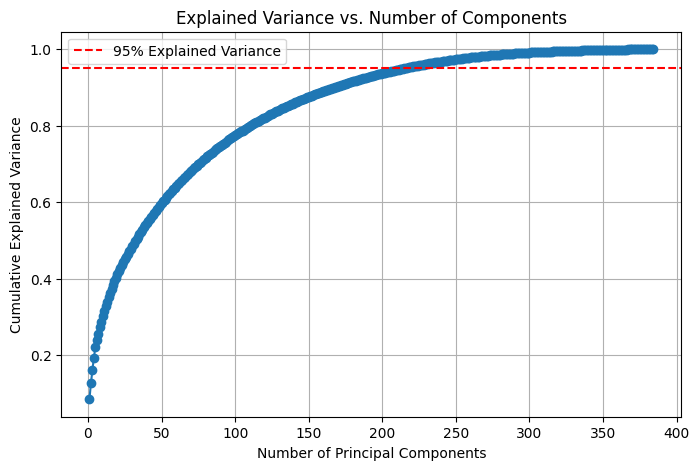

In [ ]:
pca = PCA()
pca.fit(stem_embeddings)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.show()

In [29]:
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f"Number of components to retain {desired_variance*100:.0f}% variance: {n_components}")

Number of components to retain 95% variance: 215


In [30]:
pca_reduced = PCA(n_components=n_components)
stem_reduced = pca_reduced.fit_transform(stem_embeddings)

## Reducing lem embeddings

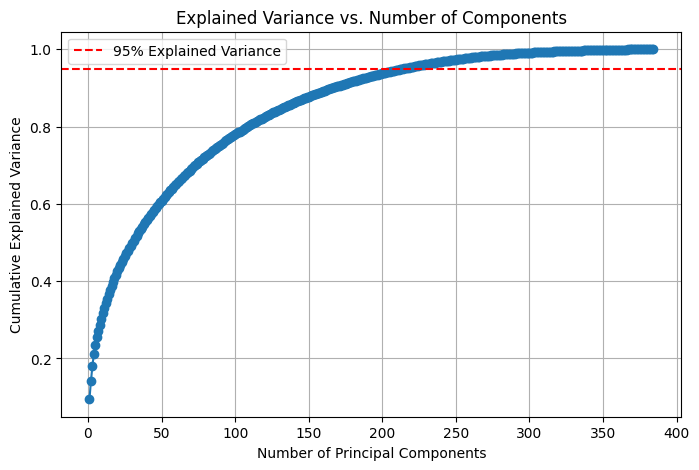

In [31]:
pca = PCA()
pca.fit(lem_embeddings)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.show()

In [32]:
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f"Number of components to retain {desired_variance*100:.0f}% variance: {n_components}")

Number of components to retain 95% variance: 215


In [34]:
pca_reduced = PCA(n_components=n_components)
lem_reduced = pca_reduced.fit_transform(lem_embeddings)

# Clustering

## KMeans

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Stem embedding

#### Non-reduced data

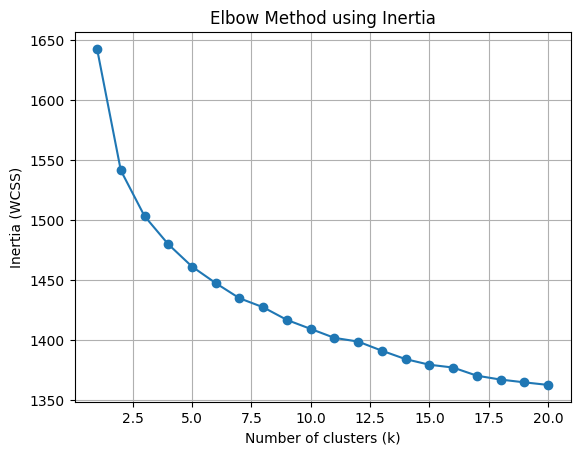

In [39]:
inertias = []
for k in range(1, 21):
   kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
   kmeans.fit(stem_embeddings)
   inertias.append(kmeans.inertia_)

plt.plot(range(1, 21), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method using Inertia')
plt.grid(True)
plt.show()

In [43]:
chosen_k = 12

kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init='auto')
labels = kmeans.fit_predict(stem_embeddings)
score = silhouette_score(stem_embeddings, labels)

print(f"Silhouette score of KMean with k={chosen_k}: {score}")
print(f"Inertia of KMeans with k={chosen_k}: {kmeans.inertia_}")

Silhouette score of KMean with k=12: 0.00915520265698433
Inertia of KMeans with k=12: 1398.65185546875


#### Reduced data

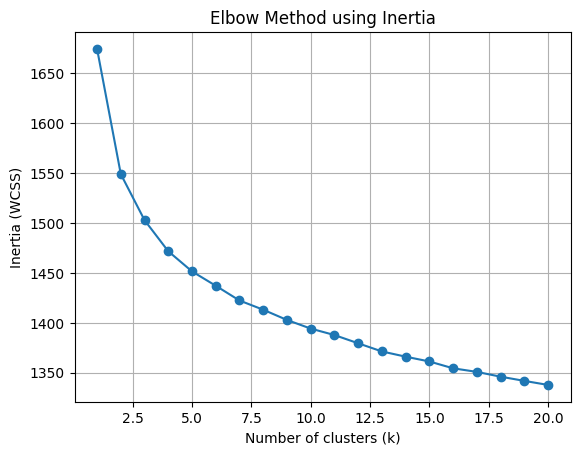

In [38]:
inertias = []
for k in range(1, 21):
   kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
   kmeans.fit(stem_reduced)
   inertias.append(kmeans.inertia_)

plt.plot(range(1, 21), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method using Inertia')
plt.grid(True)
plt.show()

In [46]:
chosen_k = 10

kmeans_reduced = KMeans(n_clusters=chosen_k, random_state=42, n_init='auto')
labels_reduced = kmeans_reduced.fit_predict(stem_reduced)
score_reduced = silhouette_score(stem_reduced, labels)

print(f"Silhouette score of KMean with k={chosen_k}: {score_reduced}")
print(f"Inertia of KMeans with k={chosen_k}: {kmeans.inertia_}")

Silhouette score of KMean with k=10: 0.020496932789683342
Inertia of KMeans with k=10: 1394.2388916015625


#### Visualization

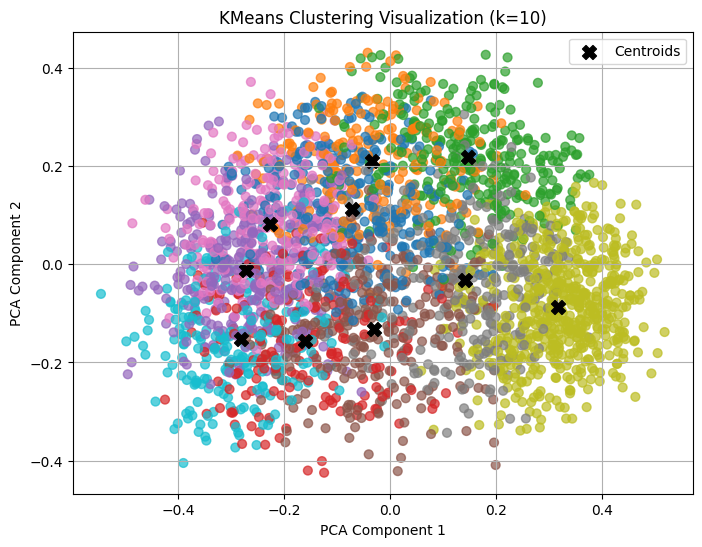

In [48]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(stem_reduced)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_reduced, cmap='tab10', s=40, alpha=0.7)
plt.scatter(kmeans_reduced.cluster_centers_[:, 0], kmeans_reduced.cluster_centers_[:, 1], 
            c='black', marker='X', s=100, label='Centroids')
plt.title(f'KMeans Clustering Visualization (k={chosen_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

#### Sampling from clusters

In [54]:
unique_labels = np.unique(labels_reduced)

for cluster_id in unique_labels:
   
   cluster_indices = [i for i, lbl in enumerate(labels) if lbl == cluster_id]
   
   print(f"\nCluster {cluster_id}:")
   for i in range(min(2, len(cluster_indices))):
      idx = cluster_indices[i]
      print(f"  Sample {i+1}: {stem_texts[idx]}")


Cluster 0:
  Sample 1: im sleep tonight wolv dream life that better plan long wind fall isnt long reveng safe safe she two bitter end watch friend enjoy sun embrac stori theyv told ear wall speak softli
  Sample 2: lick lip one last time see reflect horror face die whim word deem poetic everyon path follow track back ive cri sunscreen long bring sunshin cant see tear say will let fli forev dont know long tri understand what incoher will bring pain worth dont know long go like see insomniac perspect bring bunch new point view today watch sun rise grey cloud sky ive cri tear long

Cluster 1:
  Sample 1: produc j dilla choru ayo yall danc real slow caus fantast ayo yo yo yyo yo yo yoyyo fantast yo yo yoyo fantstic yo yo yoyo fantast yo yo yyo yo yo say fantaserro say huh know shhh tch aiyyo ayo yall danc real slow caus fantast skat fantast fantast
  Sample 2: hear countri song play honki tonk guitar light wwill peopl enjoy wind take away mississippi roll lover place like time song end un

### Lem embedding

#### Non-reduced data

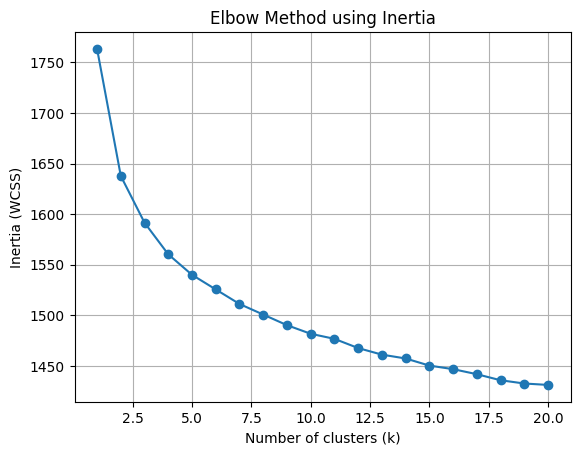

In [49]:
inertias = []
for k in range(1, 21):
   kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
   kmeans.fit(lem_embeddings)
   inertias.append(kmeans.inertia_)

plt.plot(range(1, 21), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method using Inertia')
plt.grid(True)
plt.show()

In [50]:
chosen_k = 15

kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init='auto')
labels = kmeans.fit_predict(lem_embeddings)
score = silhouette_score(lem_embeddings, labels)

print(f"Silhouette score of KMean with k={chosen_k}: {score}")
print(f"Inertia of KMeans with k={chosen_k}: {kmeans.inertia_}")

Silhouette score of KMean with k=15: 0.006904670037329197
Inertia of KMeans with k=15: 1450.40185546875


#### Reduced data

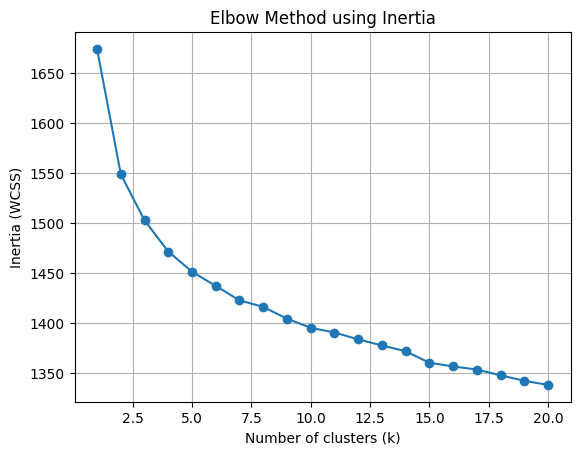

In [51]:
inertias = []
for k in range(1, 21):
   kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
   kmeans.fit(lem_reduced)
   inertias.append(kmeans.inertia_)

plt.plot(range(1, 21), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method using Inertia')
plt.grid(True)
plt.show()

In [52]:
chosen_k = 15

kmeans_reduced = KMeans(n_clusters=chosen_k, random_state=42, n_init='auto')
labels_reduced = kmeans_reduced.fit_predict(lem_reduced)
score_reduced = silhouette_score(lem_reduced, labels)

print(f"Silhouette score of KMean with k={chosen_k}: {score_reduced}")
print(f"Inertia of KMeans with k={chosen_k}: {kmeans.inertia_}")

Silhouette score of KMean with k=15: 0.009046765975654125
Inertia of KMeans with k=15: 1337.8583984375


#### Visualization

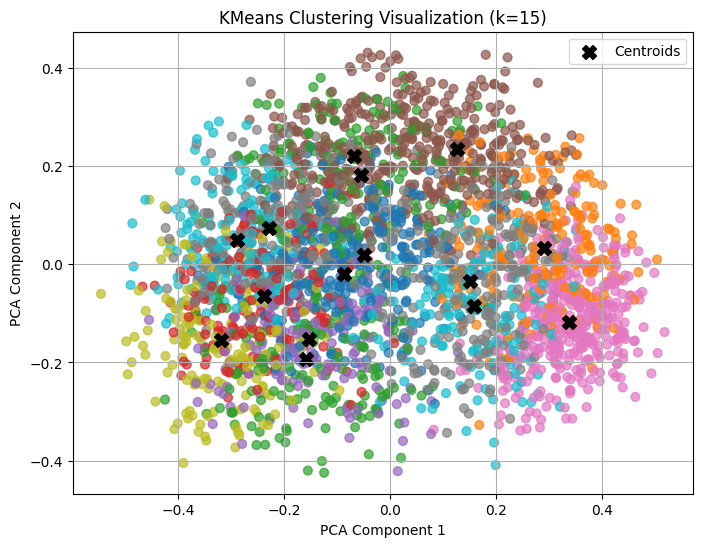

In [53]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(lem_reduced)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_reduced, cmap='tab10', s=40, alpha=0.7)
plt.scatter(kmeans_reduced.cluster_centers_[:, 0], kmeans_reduced.cluster_centers_[:, 1], 
            c='black', marker='X', s=100, label='Centroids')
plt.title(f'KMeans Clustering Visualization (k={chosen_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

#### Sampling from clusters

In [55]:
unique_labels = np.unique(labels_reduced)

for cluster_id in unique_labels:
   
   cluster_indices = [i for i, lbl in enumerate(labels) if lbl == cluster_id]
   
   print(f"\nCluster {cluster_id}:")
   for i in range(min(2, len(cluster_indices))):
      idx = cluster_indices[i]
      print(f"  Sample {i+1}: {lem_texts[idx]}")


Cluster 0:
  Sample 1: Im sleep tonight wolf dream life thats well plan long wind fall isnt longing revenge safe safe Shes two bitter end watch friend Enjoy sun embrace Stories theyve tell ear wall Speak softly
  Sample 2: Lick lips one last time see reflection horror face die whim word deem poetic Everyone path follow track back Ive cry sunscreen long bring sunshine cant see tear say will let fly forever dont know long Trying understand whats incoherent will bring pain worth dont know long go like Seeing insomniacs perspective Brings bunch new point view Today watch sun rise grey cloud sky Ive cry tear long

Cluster 1:
  Sample 1: Produced J Dilla Chorus Ayo yall dance real slow Cause fantastic Ayo yo yo yyo yo yo yoyyo fantastic Yo yo yoyo fantstic yo yo yoyo fantastic Yo yo yyo yo yo say fantaserro say huh know shhh tch aiyyo Ayo yall dance real slow Cause fantastic skatting fantastic fantastic
  Sample 2: hear country song play honky tonk guitar light wwill people enjoy wind take 

Stemmed texts (after dimension reduction) has led to the highest silhouette score through different cases.

## DBSCAN

In [63]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

### Stem embedding

#### Non-reduced data

##### Choosing epsilon

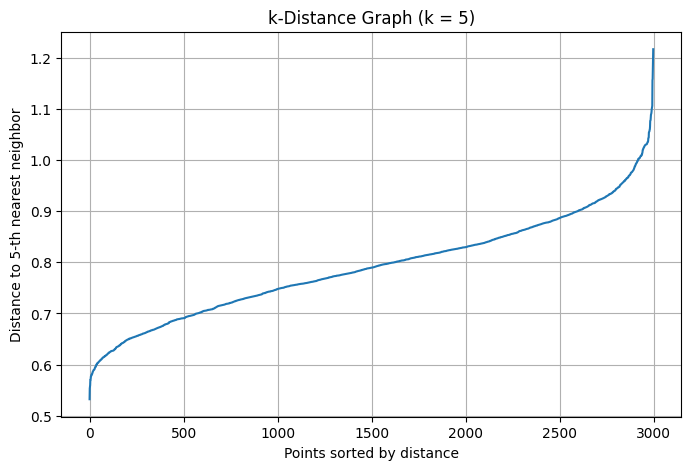

In [74]:
min_samples = 5

neigh = NearestNeighbors(n_neighbors=min_samples)
neigh.fit(stem_embeddings)

distances, indices = neigh.kneighbors(stem_embeddings)
k_distances = np.sort(distances[:, -1])

plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.title(f'k-Distance Graph (k = {min_samples})')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {min_samples}-th nearest neighbor')
plt.grid(True)
plt.show()

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=5)

dbscan_labels = dbscan.fit_predict(stem_embeddings)

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = np.sum(dbscan_labels == -1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

Estimated number of clusters: 1
Estimated number of noise points: 37


In [ ]:
if n_clusters >= 2:
   score = silhouette_score(stem_embeddings, dbscan_labels)
   print(f"Silhouette Score (with noise): {score:.4f}")
else:
   print("Silhouette score cannot be computed: fewer than 2 clusters found.")

Silhouette score cannot be computed: fewer than 2 clusters found.


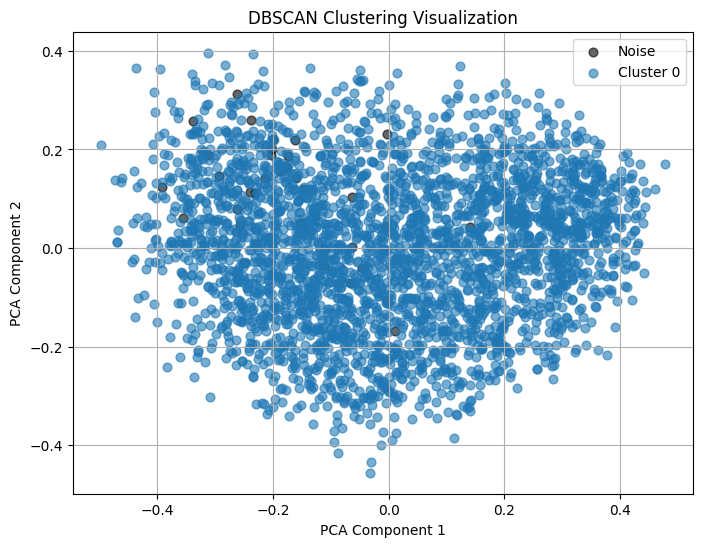

In [73]:
X_2d = PCA(n_components=2).fit_transform(stem_embeddings)

plt.figure(figsize=(8, 6))
unique_labels = np.unique(dbscan_labels)

for label in unique_labels:
   if label == -1:
      color = 'k'
      label_name = 'Noise'
   else:
      color = plt.cm.tab10(label % 10)
      label_name = f'Cluster {label}'

   mask = dbscan_labels == label
   plt.scatter(X_2d[mask, 0], X_2d[mask, 1], s=40, c=[color], label=label_name, alpha=0.6)

plt.title("DBSCAN Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

#### Reduced data

##### Choosing epsilon

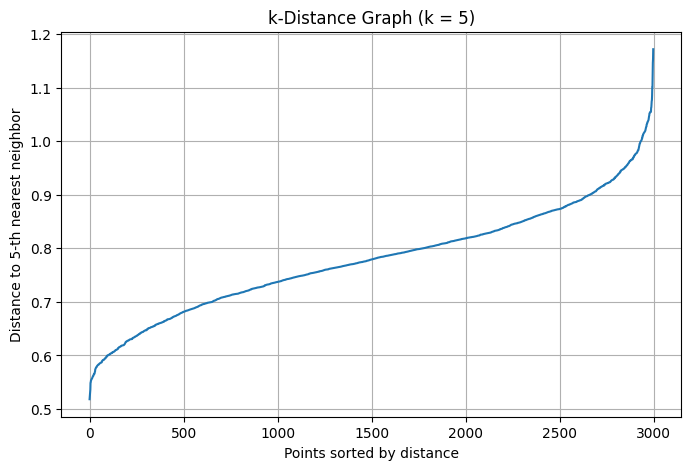

In [76]:
min_samples = 5

neigh = NearestNeighbors(n_neighbors=min_samples)
neigh.fit(stem_reduced)

distances, indices = neigh.kneighbors(stem_reduced)
k_distances = np.sort(distances[:, -1])

plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.title(f'k-Distance Graph (k = {min_samples})')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {min_samples}-th nearest neighbor')
plt.grid(True)
plt.show()

In [77]:
dbscan = DBSCAN(eps=1, min_samples=5)

dbscan_labels = dbscan.fit_predict(stem_reduced)

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = np.sum(dbscan_labels == -1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

Estimated number of clusters: 1
Estimated number of noise points: 29


In [79]:
if n_clusters >= 2:
   score = silhouette_score(stem_reduced, dbscan_labels)
   print(f"Silhouette Score (with noise): {score:.4f}")
else:
   print("Silhouette score cannot be computed: fewer than 2 clusters found.")

Silhouette score cannot be computed: fewer than 2 clusters found.


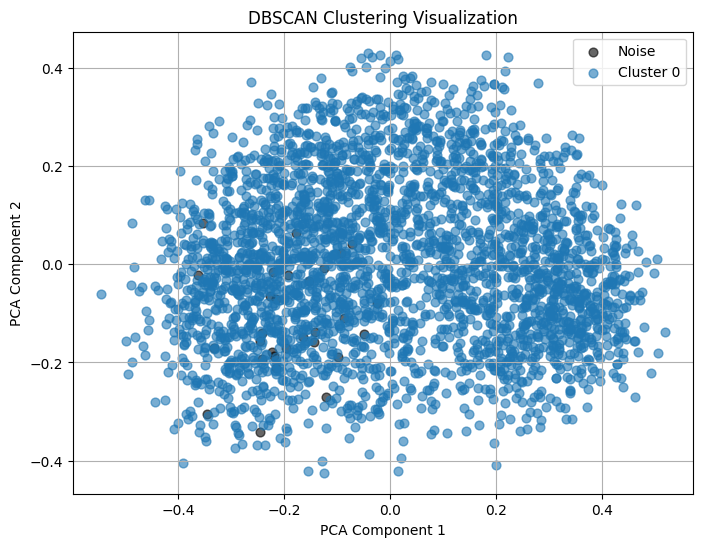

In [80]:
X_2d = PCA(n_components=2).fit_transform(stem_reduced)

plt.figure(figsize=(8, 6))
unique_labels = np.unique(dbscan_labels)

for label in unique_labels:
   if label == -1:
      color = 'k'
      label_name = 'Noise'
   else:
      color = plt.cm.tab10(label % 10)
      label_name = f'Cluster {label}'

   mask = dbscan_labels == label
   plt.scatter(X_2d[mask, 0], X_2d[mask, 1], s=40, c=[color], label=label_name, alpha=0.6)

plt.title("DBSCAN Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

### Lem embedding

#### Non-reduced data

##### Choosing epsilon

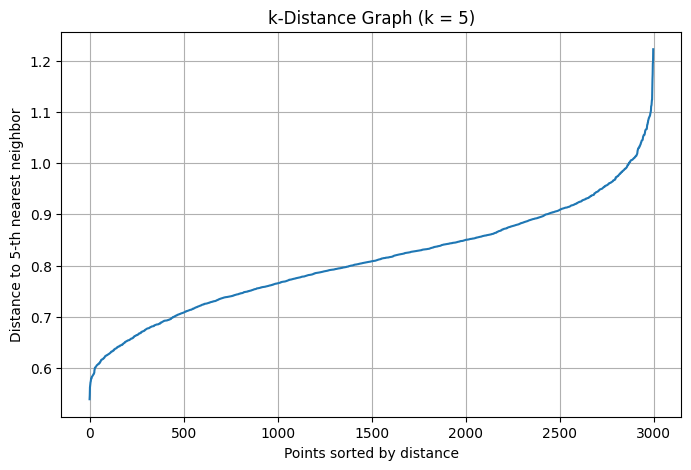

In [81]:
min_samples = 5

neigh = NearestNeighbors(n_neighbors=min_samples)
neigh.fit(lem_embeddings)

distances, indices = neigh.kneighbors(lem_embeddings)
k_distances = np.sort(distances[:, -1])

plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.title(f'k-Distance Graph (k = {min_samples})')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {min_samples}-th nearest neighbor')
plt.grid(True)
plt.show()

In [87]:
dbscan = DBSCAN(eps=1, min_samples=5)

dbscan_labels = dbscan.fit_predict(lem_embeddings)

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = np.sum(dbscan_labels == -1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

Estimated number of clusters: 1
Estimated number of noise points: 62


In [88]:
if n_clusters >= 2:
   score = silhouette_score(lem_embeddings, dbscan_labels)
   print(f"Silhouette Score (with noise): {score:.4f}")
else:
   print("Silhouette score cannot be computed: fewer than 2 clusters found.")

Silhouette score cannot be computed: fewer than 2 clusters found.


##### Visualization

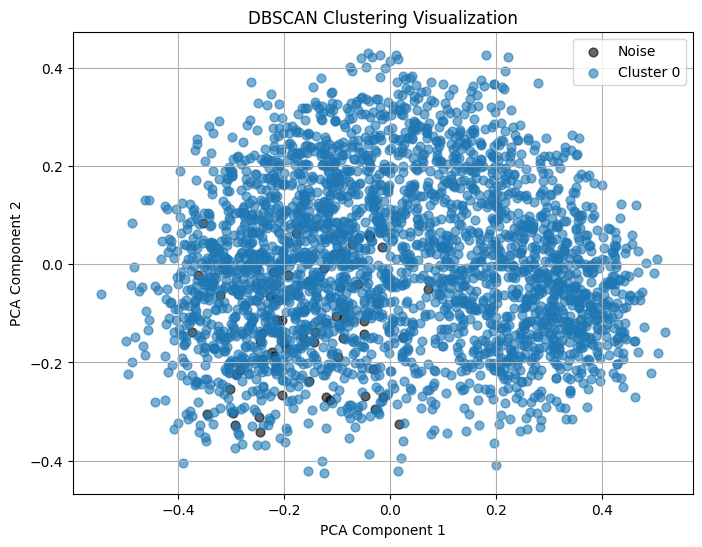

In [89]:
X_2d = PCA(n_components=2).fit_transform(lem_embeddings)

plt.figure(figsize=(8, 6))
unique_labels = np.unique(dbscan_labels)

for label in unique_labels:
   if label == -1:
      color = 'k'
      label_name = 'Noise'
   else:
      color = plt.cm.tab10(label % 10)
      label_name = f'Cluster {label}'

   mask = dbscan_labels == label
   plt.scatter(X_2d[mask, 0], X_2d[mask, 1], s=40, c=[color], label=label_name, alpha=0.6)

plt.title("DBSCAN Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

#### Reduced data

##### Choosing epsilon

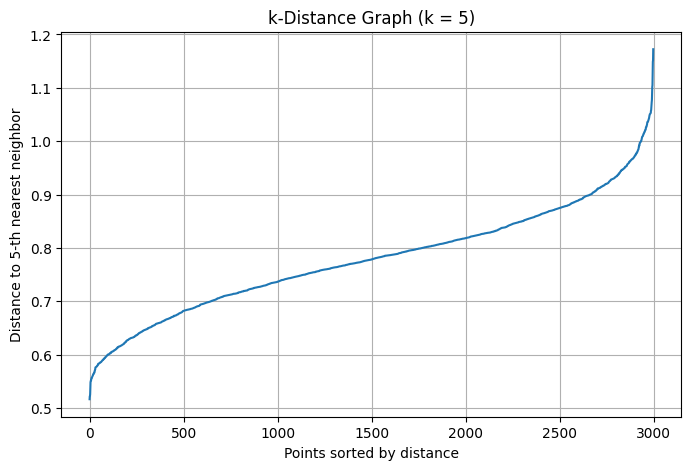

In [86]:
min_samples = 5

neigh = NearestNeighbors(n_neighbors=min_samples)
neigh.fit(lem_reduced)

distances, indices = neigh.kneighbors(lem_reduced)
k_distances = np.sort(distances[:, -1])

plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.title(f'k-Distance Graph (k = {min_samples})')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {min_samples}-th nearest neighbor')
plt.grid(True)
plt.show()

In [90]:
dbscan = DBSCAN(eps=1, min_samples=5)

dbscan_labels = dbscan.fit_predict(lem_reduced)

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = np.sum(dbscan_labels == -1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

Estimated number of clusters: 1
Estimated number of noise points: 29


In [91]:
if n_clusters >= 2:
   score = silhouette_score(lem_reduced, dbscan_labels)
   print(f"Silhouette Score (with noise): {score:.4f}")
else:
   print("Silhouette score cannot be computed: fewer than 2 clusters found.")

Silhouette score cannot be computed: fewer than 2 clusters found.


##### Visualization

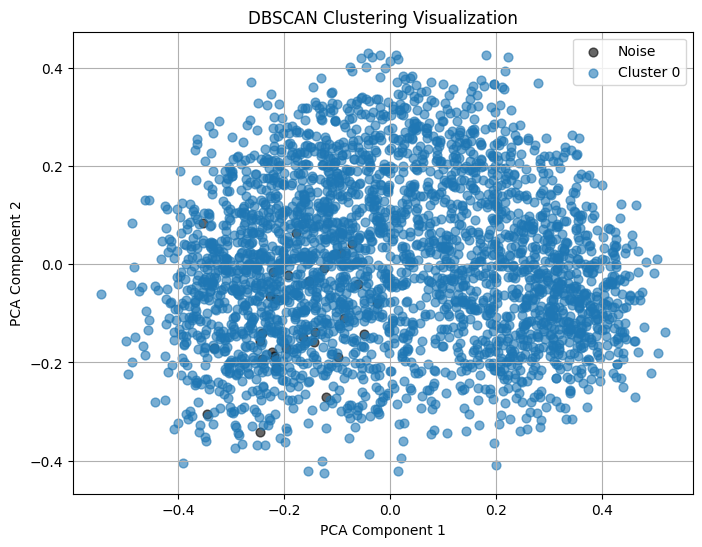

In [92]:
X_2d = PCA(n_components=2).fit_transform(lem_reduced)

plt.figure(figsize=(8, 6))
unique_labels = np.unique(dbscan_labels)

for label in unique_labels:
   if label == -1:
      color = 'k'
      label_name = 'Noise'
   else:
      color = plt.cm.tab10(label % 10)
      label_name = f'Cluster {label}'

   mask = dbscan_labels == label
   plt.scatter(X_2d[mask, 0], X_2d[mask, 1], s=40, c=[color], label=label_name, alpha=0.6)

plt.title("DBSCAN Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

## Hierarchical Clustering

In [98]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

### Stem embedding

#### Non-Reduced data

In [95]:
linked = linkage(stem_embeddings, method='ward')

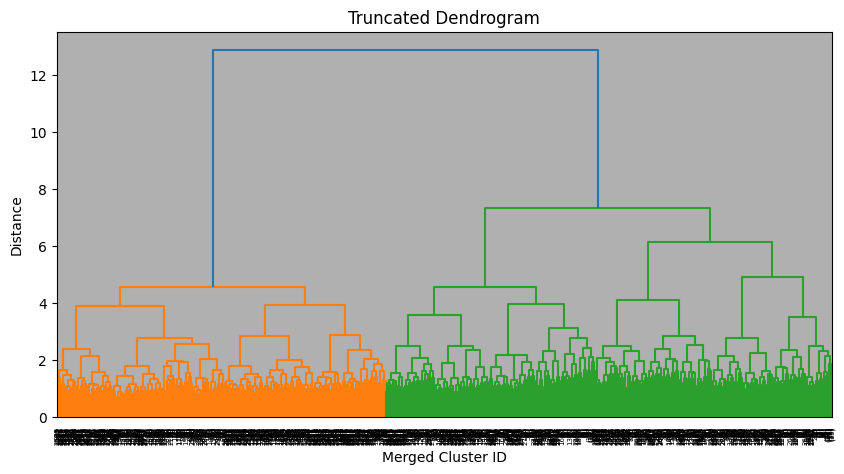

In [97]:
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=10)
plt.title("Truncated Dendrogram")
plt.xlabel("Merged Cluster ID")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [ ]:
best_score = -1
best_k = None

for k in range(2, 21):
   labels = fcluster(linked, k, criterion='maxclust') - 1
   score = silhouette_score(stem_embeddings, labels)
   print(f"k = {k}, silhouette score = {score:.4f}")
   if score > best_score:
      best_score = score
      best_k = k

print(f"\nBest k: {best_k}, best silhouette score: {best_score:.4f}")

k = 2, silhouette score = 0.0383
k = 3, silhouette score = 0.0382
k = 4, silhouette score = 0.0343
k = 5, silhouette score = 0.0243
k = 6, silhouette score = 0.0183
k = 7, silhouette score = 0.0019
k = 8, silhouette score = 0.0039
k = 9, silhouette score = 0.0035
k = 10, silhouette score = 0.0001
k = 11, silhouette score = -0.0048
k = 12, silhouette score = -0.0060
k = 13, silhouette score = -0.0049
k = 14, silhouette score = -0.0038
k = 15, silhouette score = -0.0035
k = 16, silhouette score = -0.0058
k = 17, silhouette score = -0.0049
k = 18, silhouette score = -0.0048
k = 19, silhouette score = -0.0199
k = 20, silhouette score = -0.0192

Best k: 2, best silhouette score: 0.0383


In [102]:
h_labels = fcluster(linked, best_k, criterion='maxclust') - 1

##### Visualization

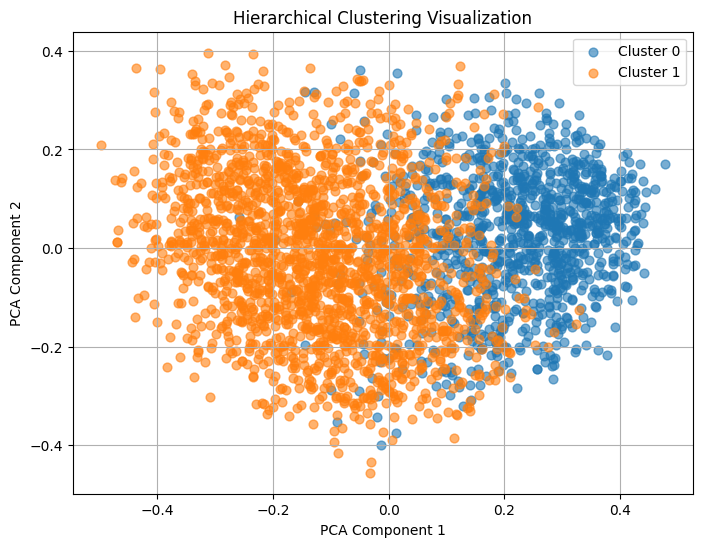

In [103]:
X_2d = PCA(n_components=2).fit_transform(stem_embeddings)

plt.figure(figsize=(8, 6))
unique_labels = np.unique(h_labels)

for label in unique_labels:
   if label == -1:
      color = 'k'
      label_name = 'Noise'
   else:
      color = plt.cm.tab10(label % 10)
      label_name = f'Cluster {label}'

   mask = h_labels == label
   plt.scatter(X_2d[mask, 0], X_2d[mask, 1], s=40, c=[color], label=label_name, alpha=0.6)

plt.title("Hierarchical Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

#### Reduced data

In [105]:
linked_reduced = linkage(stem_reduced, method='ward')

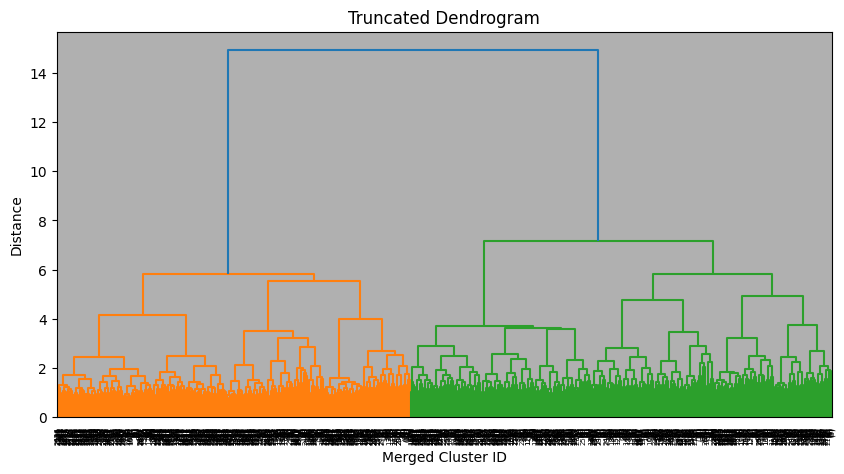

In [106]:
plt.figure(figsize=(10, 5))
dendrogram(linked_reduced, truncate_mode='level', p=10)
plt.title("Truncated Dendrogram")
plt.xlabel("Merged Cluster ID")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [ ]:
best_score = -1
best_k = None

for k in range(2, 21):
   labels = fcluster(linked_reduced, k, criterion='maxclust') - 1
   score = silhouette_score(stem_embeddings, labels)
   print(f"k = {k}, silhouette score = {score:.4f}")
   if score > best_score:
      best_score = score
      best_k = k

print(f"\nBest k: {best_k}, best silhouette score: {best_score:.4f}")

k = 2, silhouette score = 0.0460
k = 3, silhouette score = 0.0426
k = 4, silhouette score = 0.0354
k = 5, silhouette score = -0.0003
k = 6, silhouette score = -0.0045
k = 7, silhouette score = -0.0024
k = 8, silhouette score = -0.0040
k = 9, silhouette score = -0.0118
k = 10, silhouette score = -0.0133
k = 11, silhouette score = -0.0124
k = 12, silhouette score = -0.0120
k = 13, silhouette score = -0.0125
k = 14, silhouette score = -0.0127
k = 15, silhouette score = -0.0187
k = 16, silhouette score = -0.0175
k = 17, silhouette score = -0.0165
k = 18, silhouette score = -0.0175
k = 19, silhouette score = -0.0167
k = 20, silhouette score = -0.0167

Best k: 2, best silhouette score: 0.0460


In [108]:
h_labels_reduced = fcluster(linked_reduced, best_k, criterion='maxclust') - 1

##### Visualization

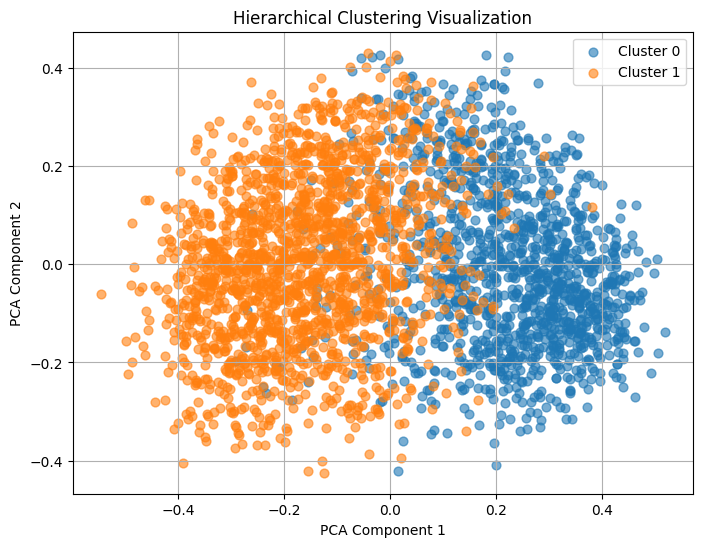

In [109]:
X_2d = PCA(n_components=2).fit_transform(stem_reduced)

plt.figure(figsize=(8, 6))
unique_labels = np.unique(h_labels_reduced)

for label in unique_labels:
   if label == -1:
      color = 'k'
      label_name = 'Noise'
   else:
      color = plt.cm.tab10(label % 10)
      label_name = f'Cluster {label}'

   mask = h_labels_reduced == label
   plt.scatter(X_2d[mask, 0], X_2d[mask, 1], s=40, c=[color], label=label_name, alpha=0.6)

plt.title("Hierarchical Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

#### Sampling from clusters

In [110]:
unique_labels = np.unique(h_labels_reduced)

for cluster_id in unique_labels:
   
   cluster_indices = [i for i, lbl in enumerate(labels) if lbl == cluster_id]
   
   print(f"\nCluster {cluster_id}:")
   for i in range(min(2, len(cluster_indices))):
      idx = cluster_indices[i]
      print(f"  Sample {i+1}: {stem_texts[idx]}")


Cluster 0:
  Sample 1: parodi sir mixalot song babi got back feel sick just might die honestli dont know doc walk huge sering big grin face pass doctor mine learn witch doctor mine god name wearin butt stickin rear end oh god wan na go back home go bathroom homeboy came visit doc saw cut kiss termomet pull doesnt wan na put mouth said back back caus aint gon na shove butt feel much better now hell medicin bed lead he poke head food made slime realli crime take averag dinner eat stuff come right back cook yeah cook yeah tast better come back hell yeah doctor said eat eat eat eat itll make feel alright doc quack doctor quack nurs big round took whole town just couldnt help saw puke went flyin without even tryin knock floor clear zap clear zap aint takin pill that birth control couldnt tell doctor came test reflex there reflex middl chin hit mouth cave im lookin doc reput solid rock cant doc smart im stuck groucho marx somebodi get help pleas call paramed doc pathet caus want drill hole 

#### Lem embedding

#### Non-reduced data

In [111]:
linked = linkage(lem_embeddings, method='ward')

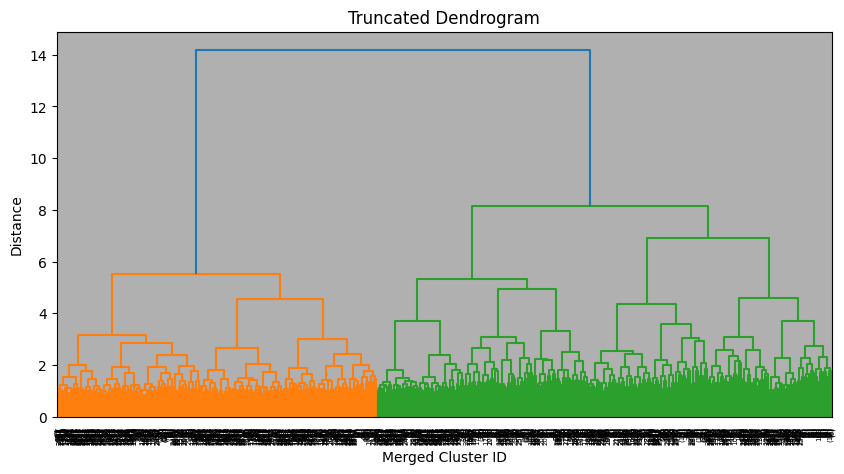

In [112]:
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=10)
plt.title("Truncated Dendrogram")
plt.xlabel("Merged Cluster ID")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [ ]:
best_score = -1
best_k = None

for k in range(2, 21):
   labels = fcluster(linked, k, criterion='maxclust') - 1
   score = silhouette_score(lem_embeddings, labels)
   print(f"k = {k}, silhouette score = {score:.4f}")
   if score > best_score:
      best_score = score
      best_k = k

print(f"\nBest k: {best_k}, best silhouette score: {best_score:.4f}")

k = 2, silhouette score = 0.0414
k = 3, silhouette score = 0.0369
k = 4, silhouette score = 0.0379
k = 5, silhouette score = 0.0002
k = 6, silhouette score = 0.0013
k = 7, silhouette score = -0.0003
k = 8, silhouette score = 0.0021
k = 9, silhouette score = -0.0022
k = 10, silhouette score = -0.0031
k = 11, silhouette score = -0.0025
k = 12, silhouette score = -0.0022
k = 13, silhouette score = -0.0014
k = 14, silhouette score = -0.0002
k = 15, silhouette score = -0.0030
k = 16, silhouette score = -0.0021
k = 17, silhouette score = -0.0021
k = 18, silhouette score = -0.0035
k = 19, silhouette score = -0.0043
k = 20, silhouette score = -0.0062

Best k: 2, best silhouette score: 0.0414


In [114]:
h_labels = fcluster(linked, best_k, criterion='maxclust') - 1

##### Visualization

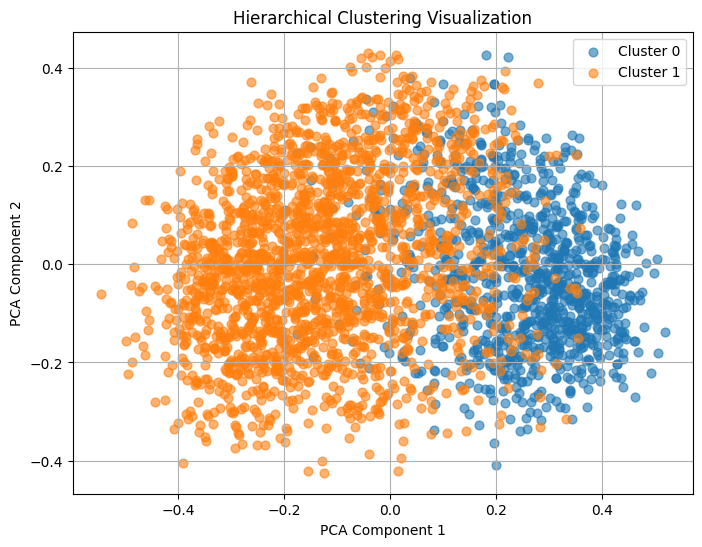

In [115]:
X_2d = PCA(n_components=2).fit_transform(lem_embeddings)

plt.figure(figsize=(8, 6))
unique_labels = np.unique(h_labels)

for label in unique_labels:
   if label == -1:
      color = 'k'
      label_name = 'Noise'
   else:
      color = plt.cm.tab10(label % 10)
      label_name = f'Cluster {label}'

   mask = h_labels == label
   plt.scatter(X_2d[mask, 0], X_2d[mask, 1], s=40, c=[color], label=label_name, alpha=0.6)

plt.title("Hierarchical Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

#### Reduced data

In [117]:
linked_reduced = linkage(lem_reduced, method='ward')

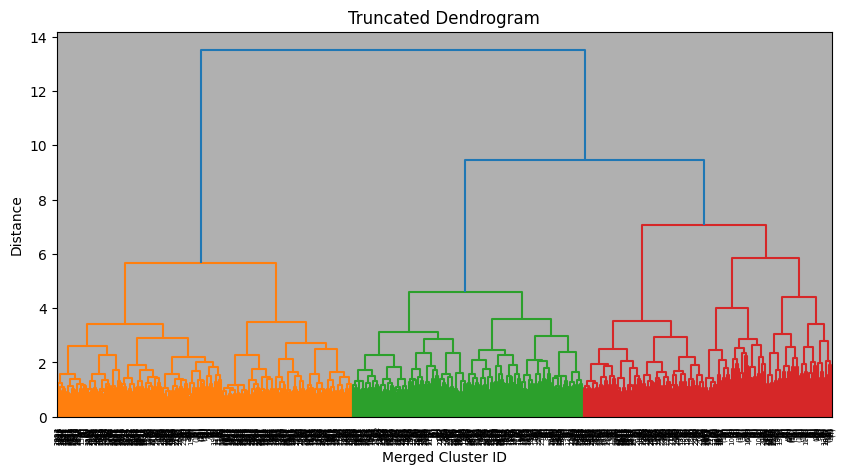

In [118]:
plt.figure(figsize=(10, 5))
dendrogram(linked_reduced, truncate_mode='level', p=10)
plt.title("Truncated Dendrogram")
plt.xlabel("Merged Cluster ID")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [120]:
best_score = -1
best_k = None

for k in range(2, 21):
   labels = fcluster(linked_reduced, k, criterion='maxclust') - 1
   score = silhouette_score(lem_reduced, labels)
   print(f"k = {k}, silhouette score = {score:.4f}")
   if score > best_score:
      best_score = score
      best_k = k

print(f"\nBest k: {best_k}, best silhouette score: {best_score:.4f}")

k = 2, silhouette score = 0.0361
k = 3, silhouette score = 0.0382
k = 4, silhouette score = 0.0273
k = 5, silhouette score = 0.0292
k = 6, silhouette score = 0.0057
k = 7, silhouette score = 0.0035
k = 8, silhouette score = 0.0050
k = 9, silhouette score = 0.0068
k = 10, silhouette score = 0.0066
k = 11, silhouette score = 0.0065
k = 12, silhouette score = 0.0016
k = 13, silhouette score = 0.0028
k = 14, silhouette score = -0.0019
k = 15, silhouette score = -0.0060
k = 16, silhouette score = -0.0053
k = 17, silhouette score = -0.0049
k = 18, silhouette score = -0.0047
k = 19, silhouette score = -0.0081
k = 20, silhouette score = -0.0072

Best k: 3, best silhouette score: 0.0382


In [121]:
h_labels_reduced = fcluster(linked_reduced, best_k, criterion='maxclust') - 1

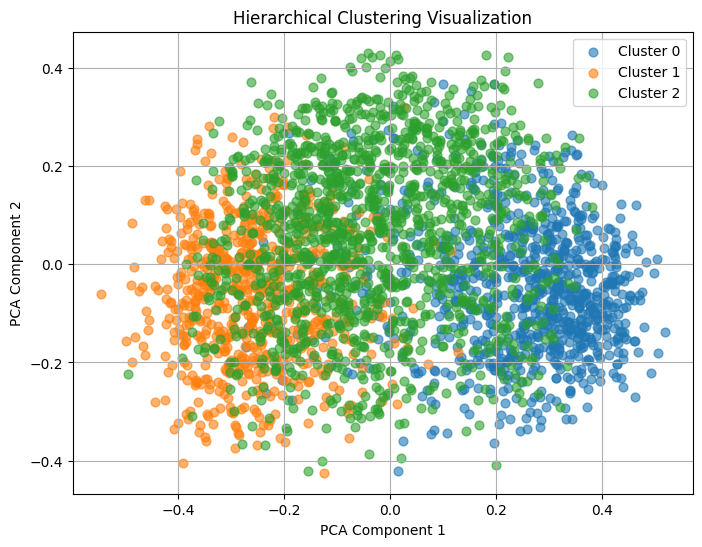

In [122]:
X_2d = PCA(n_components=2).fit_transform(stem_reduced)

plt.figure(figsize=(8, 6))
unique_labels = np.unique(h_labels_reduced)

for label in unique_labels:
   if label == -1:
      color = 'k'
      label_name = 'Noise'
   else:
      color = plt.cm.tab10(label % 10)
      label_name = f'Cluster {label}'

   mask = h_labels_reduced == label
   plt.scatter(X_2d[mask, 0], X_2d[mask, 1], s=40, c=[color], label=label_name, alpha=0.6)

plt.title("Hierarchical Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

#### Sampling from clusters

In [123]:
unique_labels = np.unique(h_labels)

for cluster_id in unique_labels:
   
   cluster_indices = [i for i, lbl in enumerate(labels) if lbl == cluster_id]
   
   print(f"\nCluster {cluster_id}:")
   for i in range(min(2, len(cluster_indices))):
      idx = cluster_indices[i]
      print(f"  Sample {i+1}: {lem_texts[idx]}")


Cluster 0:
  Sample 1: Intro Mariah Carey 4 real 4 real 4 real 4 real 4 real 4 real 4 real 4 real 4 real 4 real Hook Mariah Carey Baby baby 4 real 4 real 4 real Baby baby 4 real 4 real 4 real Baby baby 4 real 4 real 4 real Baby baby 4 real 4 real 4 real Verse 1 Mariah Carey Sometimes blow mind mine Id take time low Im shy Though front like Im next level fly guy Verse 2 Mariah Carey Really wan na reach just touch realize much Id like Come knockknocking door Give ol girl heaveho give demonstration like Chorus Mariah Carey 4 real 4 real Hundred percent 4 real Hotter cable TV Like something dream 4 real 4 real million percent deal Ill just keep eventually youll see Im 4 real 4 real Hook Mariah Carey Baby baby 4 real 4 real 4 real baby Im 4 real Baby baby 4 real 4 real 4 real Baby Im 4 real 4 real Baby baby 4 real 4 real 4 real Baby 4 real 4 real 4 real Baby baby 4 real 4 real 4 real Verse 3 Mariah Carey Oh friend say Im wasting time Tryin dissuade scheme Wan na make less seem Im one liste

In hierarchical clustering, stemmed texts (after dimension reduction) led to the highest silhouette score.

Overally comparing different clustering algorithms, hierarchical clustering ended up being the best performing one; from the perspective of silhouette score.